In [3]:
from fastai.vision.all import *
import timm
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/Endometrial-Hyperplasia')

Mounted at /content/drive


In [4]:
from EndoHypNet.scripts.balance_dataset import balance_dataset
from EndoHypNet.scripts.augmentations import AlbumentationsTransform, get_albumentations
from EndoHypNet.scripts.dataloaders import dataloaders
from EndoHypNet.training.train_resnet50 import train_model

In [5]:
DATA_DIR = Path('/content/drive/MyDrive/eh_classification')

In [6]:
balance_dataset = balance_dataset(DATA_DIR, strategy='oversample')

Original class counts: {'Normal Endometrium': 1333, 'Endometrial Hyperplasia': 798}
Balanced dataset saved to: /content/balanced_data


In [7]:
import os

dataset_path = '/content/balanced_data'

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        file_count = 0
        for entry in os.listdir(class_path):
            if os.path.isfile(os.path.join(class_path, entry)):
                file_count += 1
        print(f"Class: {class_name}, Number of files: {file_count}")

Class: Endometrial Hyperplasia, Number of files: 1333
Class: Normal Endometrium, Number of files: 1333


In [8]:
transforms = AlbumentationsTransform(get_albumentations())

In [9]:
dls = dataloaders(balance_dataset, transforms)

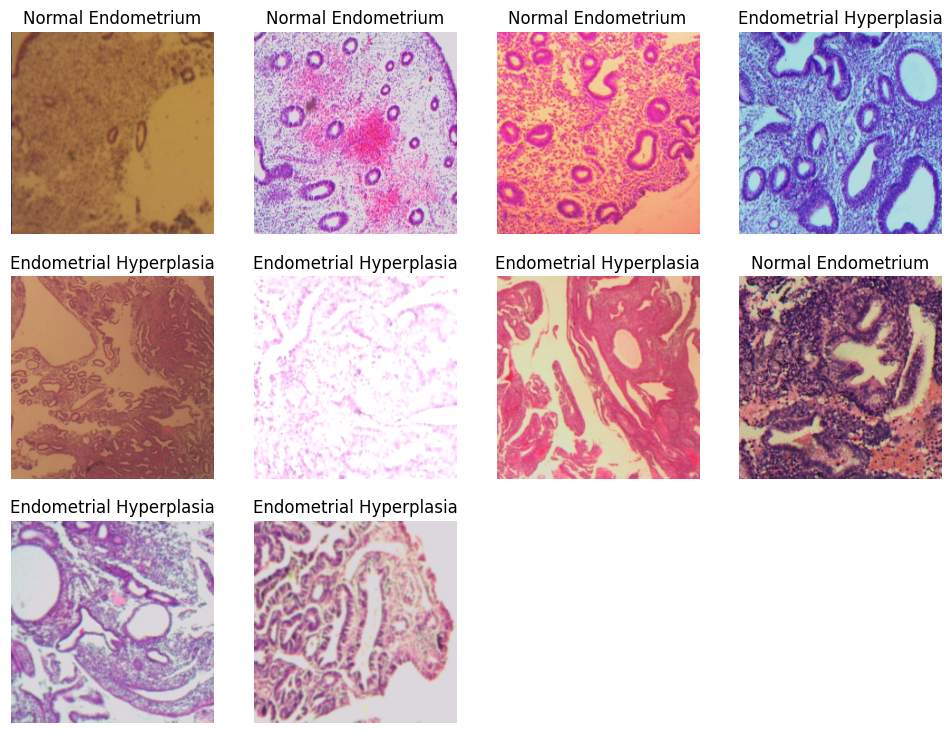

In [10]:
dls.show_batch(max_n=10)

In [ ]:
learn = train_model(dls)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.004365158267319202)

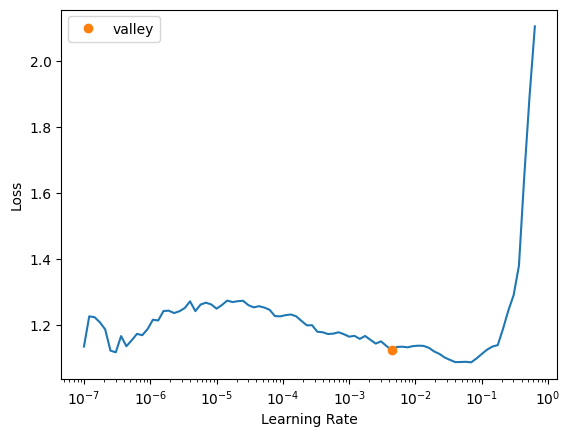

In [12]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(20, lr_max=1e-3)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.119248,0.660852,0.657303,0.659453,0.657303,0.656145,00:18
1,0.917573,0.597375,0.743446,0.744437,0.743446,0.743185,00:18
2,0.830828,0.620329,0.752809,0.753720,0.752809,0.752587,00:18
3,0.809359,0.552979,0.784644,0.784648,0.784644,0.784643,00:18
4,0.733113,0.560147,0.782772,0.788618,0.782772,0.781666,00:18
5,0.663939,0.503306,0.799625,0.800337,0.799625,0.799507,00:18
6,0.600356,0.446735,0.777154,0.781453,0.777154,0.776299,00:19
7,0.545389,0.420320,0.799625,0.801865,0.799625,0.799253,00:19
8,0.509096,0.396509,0.807116,0.807120,0.807116,0.807115,00:18
9,0.462831,0.368786,0.820225,0.822414,0.820225,0.819919,00:19


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0003981071640737355)

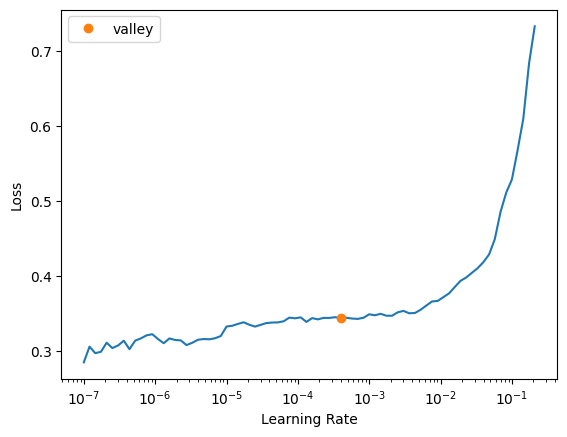

In [15]:
learn.unfreeze()
learn.lr_find()

In [16]:
learn.fit_one_cycle(20, lr_max=slice(1e-4,1e-3))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.358474,0.322992,0.833333,0.833900,0.833333,0.833263,00:18
1,0.358726,0.337440,0.840824,0.840829,0.840824,0.840823,00:20
2,0.362775,0.335012,0.840824,0.842211,0.840824,0.840662,00:18
3,0.372835,0.331621,0.844569,0.844806,0.844569,0.844543,00:18
4,0.374059,0.348782,0.857678,0.858402,0.857678,0.857606,00:20
5,0.368253,0.325966,0.840824,0.841903,0.840824,0.840698,00:19
6,0.355935,0.301788,0.868914,0.869931,0.868914,0.868824,00:19
7,0.353080,0.326600,0.867041,0.867088,0.867041,0.867037,00:19
8,0.329689,0.281808,0.863296,0.863709,0.863296,0.863257,00:18
9,0.314147,0.276897,0.872659,0.873413,0.872659,0.872595,00:20


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.00015848931798245758)

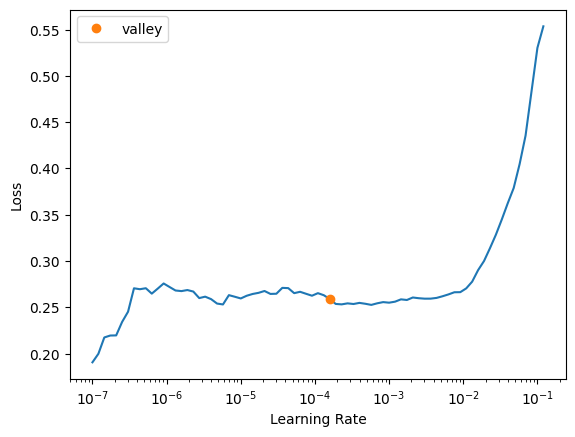

In [17]:
learn.unfreeze()
learn.lr_find()

In [18]:
learn.fit_one_cycle(20, lr_max=slice(1e-4,1e-3))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.243713,0.237008,0.897004,0.897947,0.897004,0.896943,00:20
1,0.262176,0.237521,0.897004,0.897679,0.897004,0.896960,00:18
2,0.252438,0.224797,0.904494,0.904954,0.904494,0.904467,00:19
3,0.247100,0.225919,0.904494,0.907012,0.904494,0.904346,00:18
4,0.257817,0.252282,0.889513,0.892958,0.889513,0.889270,00:18
5,0.267456,0.238580,0.900749,0.902789,0.900749,0.900623,00:19
6,0.265605,0.232635,0.902622,0.903732,0.902622,0.902555,00:18
7,0.251143,0.218549,0.897004,0.897143,0.897004,0.896995,00:18
8,0.249634,0.227349,0.898876,0.900314,0.898876,0.898786,00:20
9,0.248111,0.210744,0.900749,0.901430,0.900749,0.900707,00:18


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0004786300996784121)

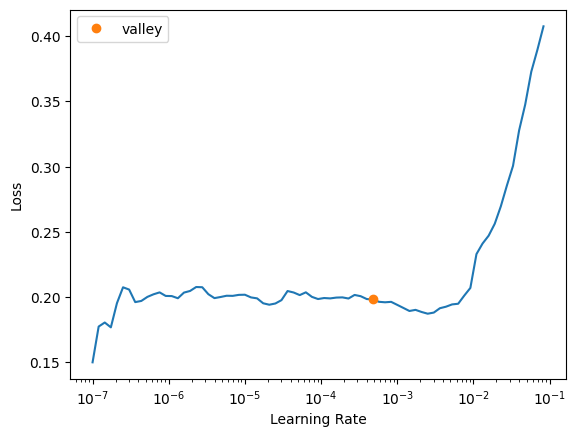

In [19]:
learn.unfreeze()
learn.lr_find()

In [21]:
learn.fit_one_cycle(20, lr_max=slice(1e-4,1e-3))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.196151,0.203211,0.919476,0.919529,0.919476,0.919473,00:20
1,0.186035,0.202522,0.919476,0.919953,0.919476,0.919453,00:19
2,0.189640,0.200289,0.919476,0.920804,0.919476,0.919412,00:18
3,0.189219,0.207386,0.919476,0.919764,0.919476,0.919462,00:19
4,0.197823,0.191319,0.917603,0.917814,0.917603,0.917593,00:18
5,0.201015,0.204308,0.925094,0.927492,0.925094,0.924988,00:19
6,0.199248,0.187249,0.923221,0.923512,0.923221,0.923208,00:19
7,0.195376,0.182661,0.925094,0.925189,0.925094,0.925089,00:18
8,0.189425,0.178274,0.911985,0.912268,0.911985,0.911970,00:19
9,0.202280,0.188990,0.921348,0.922867,0.921348,0.921278,00:18


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=9.999999747378752e-06)

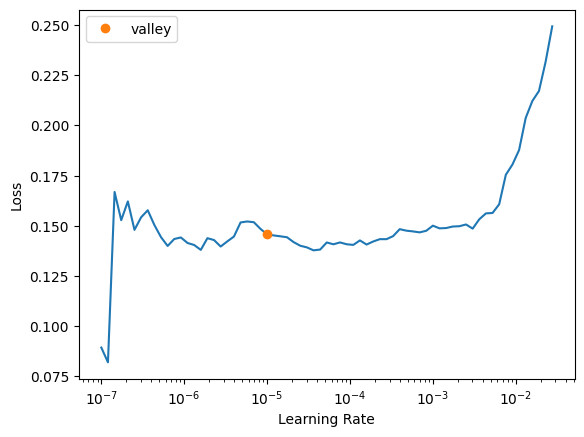

In [22]:
learn.unfreeze()
learn.lr_find()

In [23]:
learn.fit_one_cycle(20, lr_max=slice(1e-6,1e-4))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.160431,0.170781,0.923221,0.923227,0.923221,0.923221,00:18
1,0.161542,0.173312,0.921348,0.921561,0.921348,0.921338,00:19
2,0.161361,0.168360,0.925094,0.925117,0.925094,0.925093,00:19
3,0.158307,0.168606,0.921348,0.921348,0.921348,0.921348,00:18
4,0.159110,0.195440,0.919476,0.919623,0.919476,0.919469,00:19
5,0.155869,0.180637,0.923221,0.923227,0.923221,0.923221,00:19
6,0.150308,0.191820,0.925094,0.925189,0.925094,0.925089,00:18
7,0.154506,0.167801,0.925094,0.925476,0.925094,0.925077,00:20
8,0.152172,0.168234,0.926966,0.926972,0.926966,0.926966,00:18
9,0.152263,0.167369,0.928839,0.928935,0.928839,0.928835,00:18


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0002290867705596611)

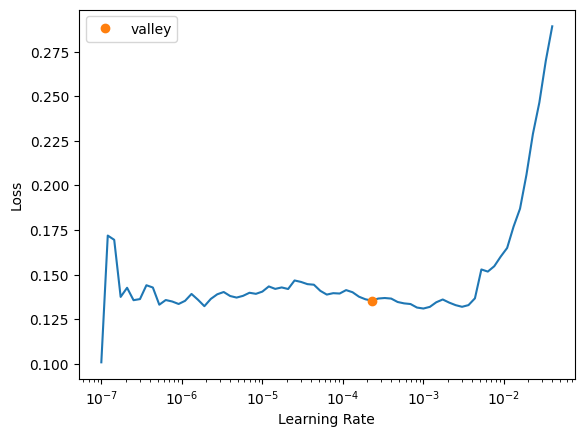

In [24]:
learn.unfreeze()
learn.lr_find()

In [25]:
learn.fit_one_cycle(20, lr_max=1e-4)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.131960,0.162099,0.936330,0.936354,0.936330,0.936329,00:19
1,0.149202,0.166123,0.926966,0.927260,0.926966,0.926954,00:20
2,0.148501,0.157434,0.930712,0.930718,0.930712,0.930711,00:18
3,0.146349,0.148844,0.941948,0.942252,0.941948,0.941938,00:18
4,0.141128,0.157174,0.932584,0.932803,0.932584,0.932576,00:20
5,0.142811,0.157597,0.928839,0.929707,0.928839,0.928803,00:18
6,0.143091,0.139180,0.936330,0.936428,0.936330,0.936326,00:19
7,0.142516,0.154214,0.936330,0.936428,0.936330,0.936326,00:19
8,0.141539,0.149368,0.943820,0.943845,0.943820,0.943819,00:18
9,0.128002,0.145472,0.941948,0.941954,0.941948,0.941947,00:20


In [27]:
learn.export('resnet50.pkl')